<img src="http://cfs22.simplicdn.net/ice9/new_logo.svgz "/>

# Project 04: Movielens Dataset Analysis

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import re
%matplotlib inline

In [2]:
df_movies=pd.read_csv('movies.dat',sep='::',names=['MovieID','Title','Genres'])

/home/ghanshyam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*h, '%d'%int(h),
                ha='center', va='bottom')


In [4]:
df_movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df_ratings=pd.read_csv('ratings.dat',sep='::',names=['UserID','MovieID','Rating','Timestamp'])

/home/ghanshyam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [6]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
df_user=pd.read_csv('users.dat',sep="::",names='UserID::Gender::Age::Occupation::Zip-code'.split('::'))

/home/ghanshyam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [8]:
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


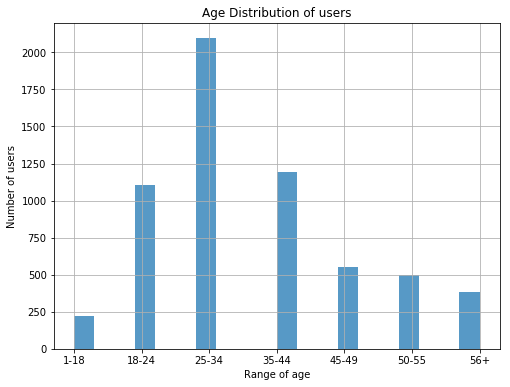

In [9]:
age_dict={1:"1-18",
 18:  "18-24",
 25:  "25-34",
 35:  "35-44",
 45:  "45-49",
 50:  "50-55",
 56:  "56+"}
ageval=df_user.Age.apply(lambda x:age_dict[x] )
plt.figure(figsize=(8,6))
ageval.hist(bins=20,alpha=0.75)
plt.title('Age Distribution of users')
plt.xlabel('Range of age')
plt.ylabel('Number of users')
plt.show()


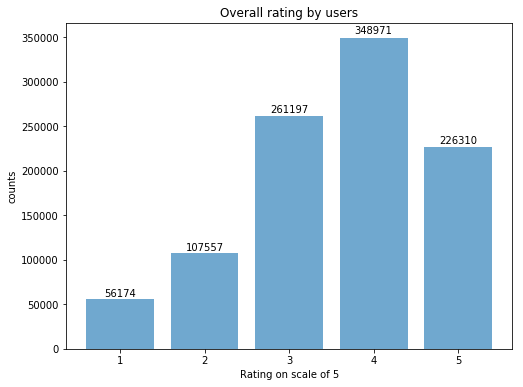

In [10]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
s=df_ratings.Rating.value_counts()

rect=ax.bar(s.index,s,alpha=0.64)
plt.title('Overall rating by users')
plt.xlabel('Rating on scale of 5')
autolabel(rect)
plt.ylabel('counts')
plt.show()

# Find and visualize the user rating of the movie “Toy Story”

In [11]:
df_movies_toystory=df_movies[df_movies.Title.apply(lambda x: bool(re.search(r'^toy story.*$',x.lower())))]

In [12]:
df_movies_toystory

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
3045,3114,Toy Story 2 (1999),Animation|Children's|Comedy


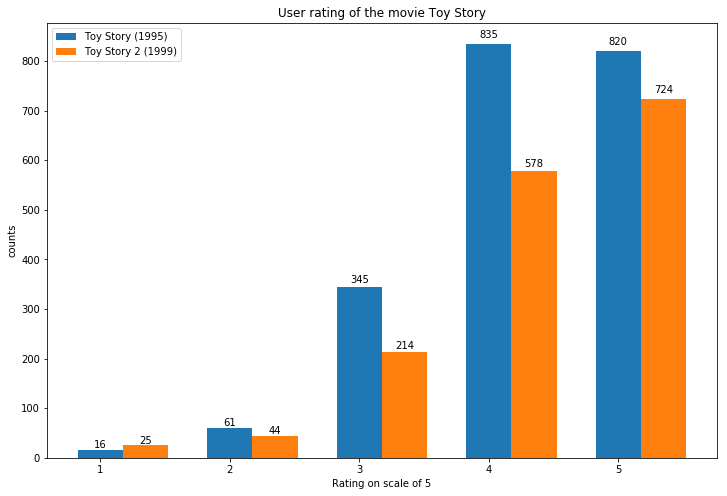

In [13]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
bar_width=0.35
gap=0

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*h, '%d'%int(h),
                ha='center', va='bottom')

for movieId,title in zip(df_movies_toystory['MovieID'],df_movies_toystory['Title']):
    df_tmp_ratings=df_ratings[df_ratings['MovieID']==movieId]
    s=df_tmp_ratings.Rating.value_counts()
    #p=s.index.tolist()
    #print('s=',s,'\n dddindex=',p)
    rect=ax.bar(s.index+gap,s,bar_width,label=title)
    autolabel(rect)
    
    gap+=bar_width
plt.title('User rating of the movie Toy Story')
plt.xlabel('Rating on scale of 5')
plt.ylabel('counts')
plt.legend()   
plt.show()

# Find and visualize the viewership of the movie “Toy Story” by age group

In [14]:
t1=df_movies_toystory.set_index('MovieID').join(df_ratings.set_index('MovieID'))
t1['MovieID']=t1.index
df_movie_age=t1.set_index('UserID').join(df_user.set_index('UserID'))
df_movie_age.head()

,Title,Genres,Rating,Timestamp,MovieID,Gender,Age,Occupation,Zip-code
UserID,,,,,,,,,
1,Toy Story (1995),Animation|Children's|Comedy,5,978824268,1,F,1,10,48067
1,Toy Story 2 (1999),Animation|Children's|Comedy,4,978302174,3114,F,1,10,48067
3,Toy Story 2 (1999),Animation|Children's|Comedy,3,978298103,3114,M,25,15,55117
6,Toy Story (1995),Animation|Children's|Comedy,4,978237008,1,F,50,9,55117
8,Toy Story (1995),Animation|Children's|Comedy,4,978233496,1,M,25,12,11413


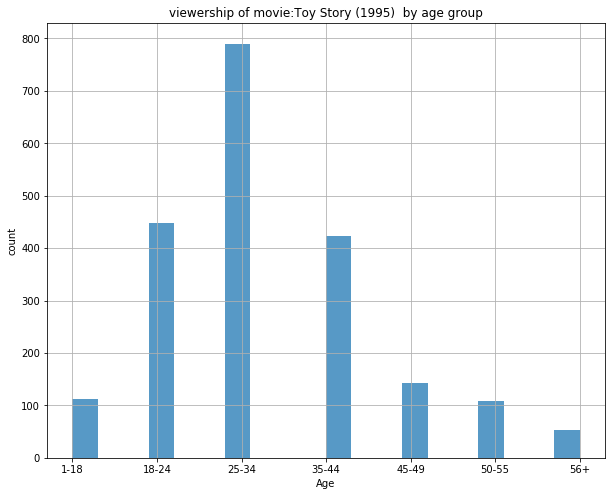

In [15]:

fig=plt.figure(figsize=(10,8))
ageformovieid_1=df_movie_age.Age[df_movie_age['MovieID']==1]
ageformovieid_1=ageformovieid_1.apply(lambda x:age_dict[x])
ageformovieid_1.hist(bins=20,alpha=0.75)

plt.title('viewership of movie:Toy Story (1995)  by age group')
plt.ylabel('count')
plt.xlabel('Age')
plt.show()

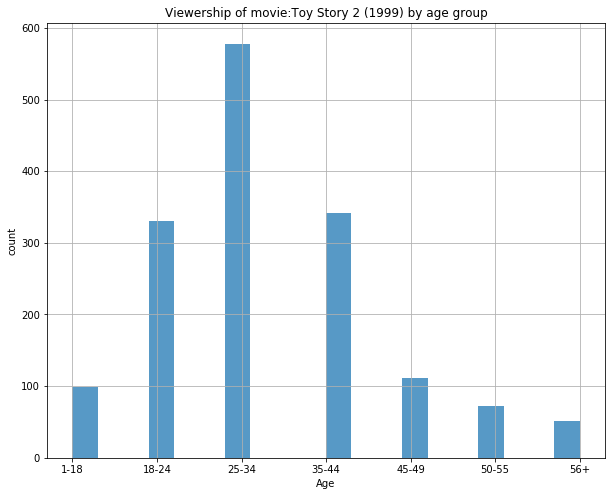

In [16]:
plt.figure(figsize=(10,8))
ageformovieid_1=df_movie_age.Age[df_movie_age['MovieID']==3114]
ageformovieid_1=ageformovieid_1.apply(lambda x:age_dict[x])
ageformovieid_1.hist(bins=20,alpha=0.75)
plt.title('Viewership of movie:Toy Story 2 (1999) by age group')
plt.ylabel('count')
plt.xlabel('Age')
plt.show()

# Find and visualize the top 25 movies by viewership rating

In [17]:

df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [18]:
df_movie_rating=df_ratings[['MovieID','Rating']]
top25=df_movie_rating.groupby(['MovieID']).mean()['Rating'].nlargest(25)
top25=pd.DataFrame(top25)
top25.index

Int64Index([ 787,  989, 1830, 3172, 3233, 3280, 3382, 3607, 3656, 3881, 3245,
              53, 2503, 2905, 2019,  318,  858,  745,   50,  527, 1148,  439,
             557,  578, 1795],
           dtype='int64', name='MovieID')

In [19]:
df_rating_25=df_ratings[df_ratings['MovieID'].isin(top25.index)]
df_rating_25=df_rating_25[['MovieID','Rating']]
print('filtered',df_rating_25.shape,'from ',df_ratings.shape)

filtered (10816, 2) from  (1000209, 4)


In [20]:
tmp=df_rating_25.groupby(['MovieID','Rating'])['Rating'].count()
tmp.head()

MovieID  Rating
50       1            8
         2           31
         3          136
         4          464
         5         1144
Name: Rating, dtype: int64

In [21]:
np_movieid_rating=np.array([list(t) for t in tmp.index])
df_heatmap=pd.DataFrame({})
df_heatmap['rating count']=tmp
df_heatmap['MovieID']=np_movieid_rating[:,0]
df_heatmap['rating']=np_movieid_rating[:,1]
df_heatmap.head()


rating count  MovieID  rating
MovieID Rating                               
50      1                  8       50       1
        2                 31       50       2
        3                136       50       3
        4                464       50       4
        5               1144       50       5

In [22]:
hitmap_pivot=df_heatmap.pivot(index='MovieID',columns='rating',values='rating count')

[]

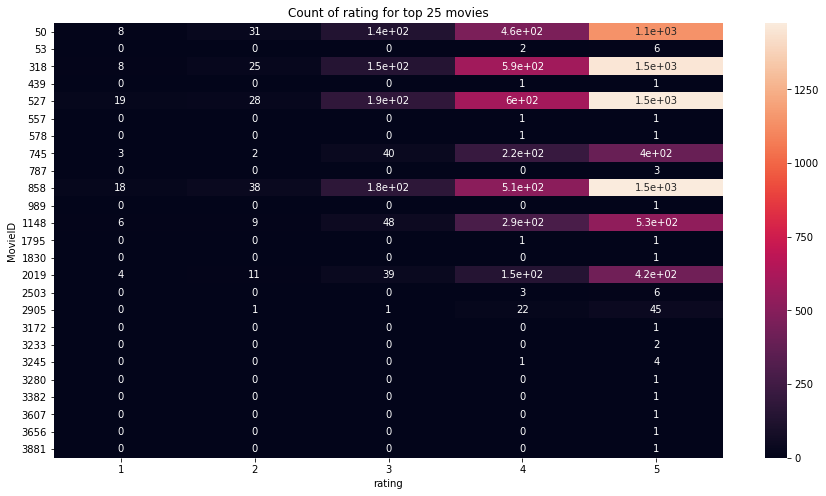

In [23]:
hitmap_pivot=hitmap_pivot.fillna(0)
plt.figure(figsize=(15,8))
sn.heatmap(hitmap_pivot,annot=True)
plt.title('Count of rating for top 25 movies')
plt.plot()

# Find the rating for a particular user of user id = 2696

In [24]:
df_ratings_2696=df_ratings[df_ratings['UserID']==2696]
df_ratings_2696

,UserID,MovieID,Rating,Timestamp
440667,2696,1258,4,973308710
440668,2696,1270,2,973308676
440669,2696,1617,4,973308842
440670,2696,1625,4,973308842
440671,2696,1644,2,973308920
440672,2696,1645,4,973308904
440673,2696,1805,4,973308886
440674,2696,1892,4,973308904
440675,2696,800,5,973308842
440676,2696,2338,2,973308920


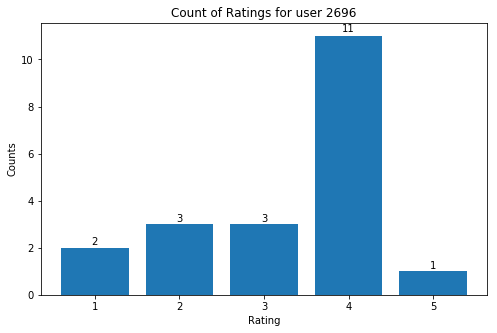

In [25]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(1,1,1)
t=df_ratings_2696[['MovieID','Rating']]
p=t['Rating'].value_counts()
rect=ax.bar(p.index,p)
autolabel(rect)
plt.title('Count of Ratings for user 2696')
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.show()

In [26]:
df_ratings_2696.head()

,UserID,MovieID,Rating,Timestamp
440667,2696,1258,4,973308710
440668,2696,1270,2,973308676
440669,2696,1617,4,973308842
440670,2696,1625,4,973308842
440671,2696,1644,2,973308920


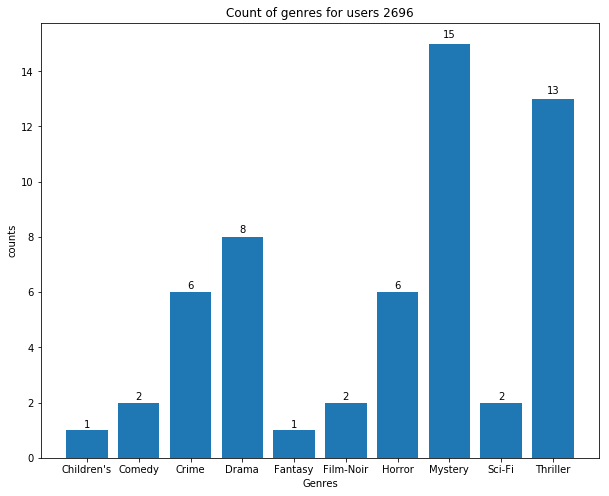

In [27]:
t=df_movies[df_movies['MovieID'].isin(df_ratings_2696['MovieID'])]
Geners=[]
for i in t['Genres']:
    for g in i.split('|'):
        Geners.append(g)
Geners=pd.Series(np.array(Geners))
p=Geners.value_counts()
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
rect=ax.bar(p.index,p)
autolabel(rect)
plt.title('Count of genres for users 2696')
plt.xlabel('Genres')
plt.ylabel('counts')
plt.show()


# Machine Learning

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import sklearn.cross_validation as cv
from sklearn import tree

In [99]:
model_knn=KNeighborsClassifier(n_neighbors=3)
model_log=LogisticRegression()
model_svm=SVC(probability=True)
model_decisiontree=tree.DecisionTreeClassifier(max_depth=5)

#### prepare data

In [100]:
df_ratings_500=df_ratings.head(500)


In [101]:
#movie id, age, occupation
df_ratings_500['age']=df_ratings_500['UserID'].map(df_user.set_index('UserID')['Age'])
df_ratings_500['occupation']=df_ratings_500['UserID'].map(df_user.set_index('UserID')['Occupation'])
df_ratings_500.head()
#df_ratings_500.to_csv('df_rating_500.csv')

/home/ghanshyam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ghanshyam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,UserID,MovieID,Rating,Timestamp,age,occupation
0,1,1193,5,978300760,1,10
1,1,661,3,978302109,1,10
2,1,914,3,978301968,1,10
3,1,3408,4,978300275,1,10
4,1,2355,5,978824291,1,10


In [102]:
x_feature=df_ratings_500[['MovieID','age','occupation']]
y_target=df_ratings_500[['Rating']]

In [103]:
print(x_feature.shape,y_target.shape)

(500, 3) (500, 1)


In [104]:
x_feature=np.array(x_feature)
y_target=np.array(y_target).ravel()

In [105]:
x_train,x_test,y_train,y_test=cv.train_test_split(x_feature,y_target)

In [106]:
model_knn.fit(x_train,y_train)
model_log.fit(x_train,y_train)
model_svm.fit(x_train,y_train)
model_decisiontree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [107]:
score_knn=model_knn.score(x_test,y_test)
score_log=model_log.score(x_test,y_test)
score_svm=model_svm.score(x_test,y_test)
score_decision_tree=model_decisiontree.score(x_test,y_test)
print('score_knn: ',score_knn,'score_log: ',score_log,'score_svm:',score_svm,'decision tree:',score_decision_tree)

score_knn:  0.184 score_log:  0.4 score_svm: 0.352 decision tree: 0.336
